In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
df=pd.read_csv('Dl-3_loan_data.csv')

In [8]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [9]:
df.shape

(9578, 14)

In [10]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [11]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [12]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [13]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

<Axes: xlabel='not.fully.paid', ylabel='count'>

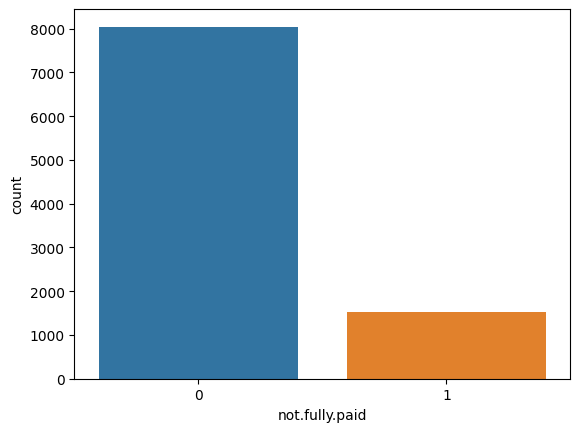

In [14]:
sns.countplot(x=df['not.fully.paid'])

In [15]:
not0=df[df['not.fully.paid']==0]
not1=df[df['not.fully.paid']==1]

In [16]:
not0.shape

(8045, 14)

In [17]:
not1.shape

(1533, 14)

In [18]:
from sklearn.utils import resample

In [19]:
not11=resample(not1,replace=True,n_samples=8045)

In [20]:
new=pd.concat([not0,not11])

In [21]:
from sklearn.utils import shuffle

In [22]:
new=shuffle(new)

In [23]:
new['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    8045
Name: count, dtype: int64

In [24]:
new.shape

(16090, 14)

In [25]:
new.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
new['purpose']=le.fit_transform(new['purpose'])

In [28]:
new.dtypes

credit.policy          int64
purpose                int32
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

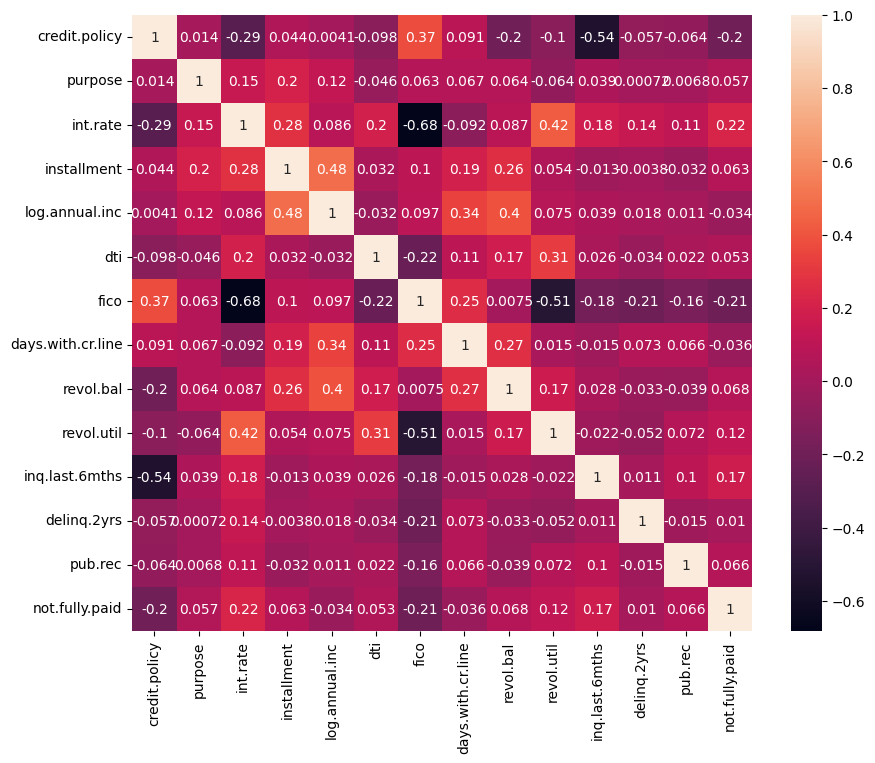

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(new.corr(),annot=True)


In [33]:
new.corr().abs()['not.fully.paid'].sort_values()

delinq.2yrs          0.010052
log.annual.inc       0.034339
days.with.cr.line    0.036119
dti                  0.052811
purpose              0.057485
installment          0.062750
pub.rec              0.065644
revol.bal            0.067833
revol.util           0.119661
inq.last.6mths       0.172135
credit.policy        0.197681
fico                 0.211605
int.rate             0.221036
not.fully.paid       1.000000
Name: not.fully.paid, dtype: float64

In [35]:
x=new[['credit.policy','purpose', 'int.rate', 'installment','fico','revol.bal','revol.util','inq.last.6mths','pub.rec']]

In [36]:
x.shape

(16090, 9)

In [37]:
y=new['not.fully.paid']

In [38]:
y.shape

(16090,)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.2)

In [40]:
X_train.shape

(12872, 9)

In [41]:
X_test.shape

(3218, 9)

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [43]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout



model = Sequential()

In [48]:
model = Sequential()

In [49]:
model.add(Dense(50,activation='relu',input_shape=[9]))
model.add(Dropout(.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1,activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,541
Trainable params: 1,541
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
model.fit(X_train ,y_train,
         epoch=20,
         batch_size=126,
         validation_data=(X_test,y_test))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\AK\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\AK\AppData\Local\Temp\ipykernel_11104\1877572029.py", line 1, in <module>
    model.fit(X_train ,y_train,
  File "C:\Users\AK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\AK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.fit() got an unexpected keyword argument 'epoch'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\AK\AppData\Local\P

In [55]:
 model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test)
         )

Epoch 1/50
51/51 [==============================] - 2s 11ms/step - loss: 0.6764 - accuracy: 0.5704 - val_loss: 0.6541 - val_accuracy: 0.6013
Epoch 2/50
51/51 [==============================] - 0s 6ms/step - loss: 0.6533 - accuracy: 0.6109 - val_loss: 0.6514 - val_accuracy: 0.6119
Epoch 3/50
51/51 [==============================] - 0s 5ms/step - loss: 0.6497 - accuracy: 0.6124 - val_loss: 0.6497 - val_accuracy: 0.6081
Epoch 4/50
51/51 [==============================] - 0s 5ms/step - loss: 0.6493 - accuracy: 0.6151 - val_loss: 0.6479 - val_accuracy: 0.6081
Epoch 5/50
51/51 [==============================] - 0s 6ms/step - loss: 0.6455 - accuracy: 0.6210 - val_loss: 0.6468 - val_accuracy: 0.6122
Epoch 6/50
51/51 [==============================] - 0s 6ms/step - loss: 0.6457 - accuracy: 0.6194 - val_loss: 0.6460 - val_accuracy: 0.6109
Epoch 7/50
51/51 [==============================] - 0s 5ms/step - loss: 0.6442 - accuracy: 0.6202 - val_loss: 0.6456 - val_accuracy: 0.6119
Epoch 8/50
51/51 [=

In [56]:
model.evaluate(X_test,y_test)

101/101 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6321


[0.6319891810417175, 0.6320695877075195]

In [57]:
model.evaluate(X_train,y_train)

403/403 [==============================] - 1s 2ms/step - loss: 0.6177 - accuracy: 0.6516


[0.6177365183830261, 0.6516469717025757]

In [58]:
pred=model.predict(X_test)

101/101 [==============================] - 0s 2ms/step


In [59]:
pred.shape

(3218, 1)

In [60]:
pred

array([[0.39106983],
       [0.47166386],
       [0.48903808],
       ...,
       [0.5527128 ],
       [0.54460466],
       [0.74269557]], dtype=float32)

In [61]:
predi=(pred>.5).astype('int')

In [62]:
predi

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [63]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(predi,y_test)

0.632069608452455